In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
file_path = "C:/Users/nicks/OneDrive/DATA ANALYST/CAPSTONE/HUD Exchange/2018-2022 Housing Inventory Count by Coc/"
file_names = [
    "2018-HIC-Raw-File",
    "2019-HIC-Raw-File",
    "2020-HIC-Raw-File",
    "2021-HIC-Raw-File",
    "2022-HIC-Raw-File"
]

dataframes = [pd.read_csv(file_path + file_name + ".csv", low_memory=False) for file_name in file_names]

# Merge the DataFrames
merged_df = pd.concat(dataframes, ignore_index=True)
remove_states = ['GU', 'PR', 'VI', 'MP']
mask = ~merged_df['CocState'].isin(remove_states)
merged_df = merged_df[mask]

# Save the merged DataFrame as a new CSV file
merged_df.to_csv(file_path + "Merged-Housing-Inventory-Counts.csv", index=False)

In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131311 entries, 0 to 132136
Columns: 116 entries, Row # to HOPWAMedAssistedLivingFac
dtypes: float64(63), int64(25), object(28)
memory usage: 117.2+ MB


In [6]:
merged_df.describe()

,Row #,Coc\ID,year,Organization ID,Project ID,Geo Code,beginsOperationsWithinYear,Mc Kinney-Vento,mcKinneyVentoEsg,mcKinneyVentoEsgEs,...,mcKinneyVentoEsgRrhCov,Total Population,County Population,mcKinneyVentoYhdp,mcKinneyVentoYhdpRenewals,federalFundingHopwaCovid,federalFundingHome,federalFundingHomeArp,federalFundingIndianEhv,HOPWAMedAssistedLivingFac
count,131311.000000,131311.000000,131311.000000,131311.000000,131311.000000,131310.000000,2035.000000,49427.000000,131311.000000,15641.000000,...,6043.000000,5.100000e+01,2.700000e+01,29323.000000,29323.000000,239.000000,29323.000000,29323.000000,29323.000000,3939.000000
mean,441405.621578,1205.853577,2020.093054,15558.589478,82268.040530,280811.612307,0.930713,0.403909,0.119084,0.626367,...,0.384908,6.535050e+06,8.075175e+05,0.004092,0.003785,0.016736,0.003649,0.001159,0.017597,1.969535
std,81202.048428,140.922096,1.424526,14728.331352,49101.065259,158718.589149,0.254005,0.490685,0.323888,0.483783,...,0.486614,7.423508e+06,7.014780e+05,0.063842,0.061410,0.128551,0.060298,0.034032,0.131484,0.243944
min,314144.000000,951.000000,2018.000000,1.000000,4.000000,10072.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.813810e+05,8.580800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,362445.500000,1070.000000,2019.000000,4389.000000,29058.000000,129033.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.857094e+06,3.003740e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,445787.000000,1213.000000,2020.000000,9064.000000,99248.000000,279003.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,4.512310e+06,6.255840e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,515097.500000,1336.000000,2021.000000,24439.000000,117972.000000,409115.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,7.572492e+06,9.406075e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,601191.000000,1511.000000,2022.000000,46385.000000,163506.000000,569041.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,3.902934e+07,2.763366e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [155]:
subset_df = merged_df[['CocState', 'CoC', 'year', 'Project Name', 'Project Type', 'Project ID', 'Geo Code', 'Total Population', 'County Population', 'PIT Count', 'Total Beds']]


### How many housing programs are there per state and do they increase or decrease year over year?

In [116]:
orgs_per_state_per_year_df = subset_df.groupby(['CocState', 'year']).agg({
    'Project ID': 'nunique'
}).reset_index()    


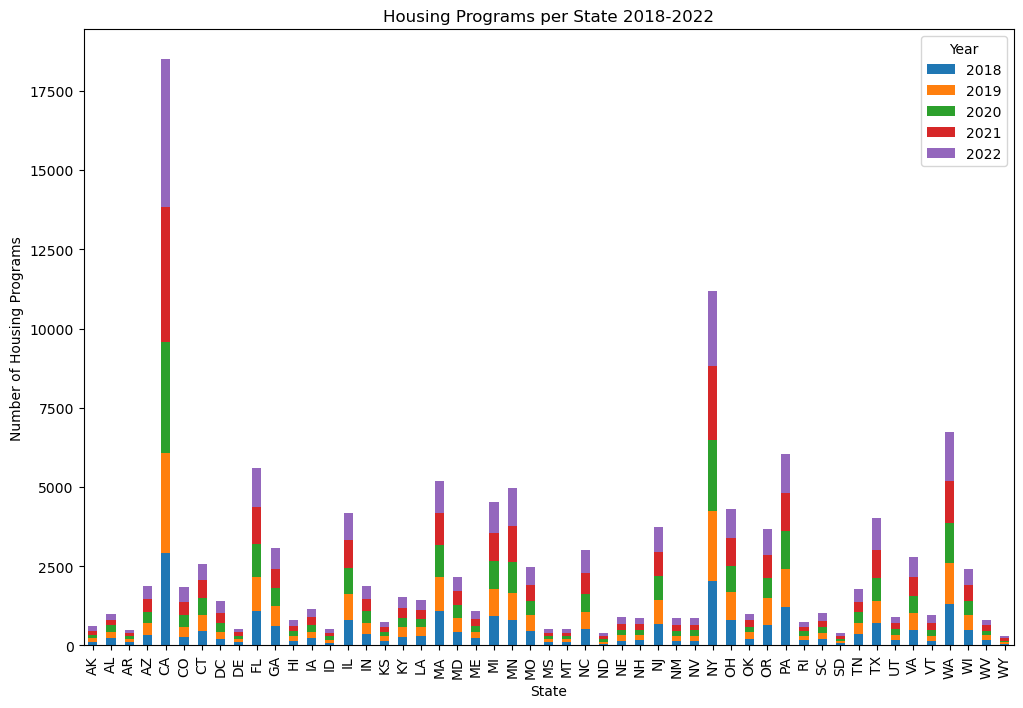

In [117]:
pivot_orgs_pspy_df = orgs_per_state_per_year_df.pivot_table(values='Project ID', index='CocState', columns='year', fill_value=0)
ax = pivot_orgs_pspy_df.plot.bar(stacked=True, figsize=(12, 8))
plt.title("Housing Programs per State 2018-2022")
plt.xlabel("State")
plt.ylabel("Number of Housing Programs")
plt.legend(title='Year', loc='upper right')
plt.show()

In [118]:
filtered_proj_table = orgs_per_state_per_year_df[orgs_per_state_per_year_df['year'].isin([2018, 2022])]
comparison_table = filtered_proj_table.pivot_table(values='Project ID', index='CocState', columns='year', fill_value=0)


In [135]:
comparison_table['Difference'] = comparison_table[2022] - comparison_table[2018]
comparison_table['Percent Change'] = ((comparison_table[2022] - comparison_table[2018]) / comparison_table[2018]) * 100
comparison_table['Percent Change'] = comparison_table['Percent Change'].round(1)
comparison_table = comparison_table.sort_values(by='Percent Change', ascending=False)

In [136]:
comparison_table

year,2018,2022,Difference,Percent Change
CocState,,,,
CO,263,475,212,80.6
DC,210,360,150,71.4
ND,56,91,35,62.5
WY,47,76,29,61.7
CA,2929,4663,1734,59.2
MN,804,1213,409,50.9
VT,154,227,73,47.4
TX,707,1015,308,43.6
AK,109,156,47,43.1


In [ ]:
# Comparing 2018 to 2022 Colorado has the highest percentage increase in the amount of programs to help the homeless with shelters/housing, Florida was below the median at a 13.7 increase in programs and
# Alabama was at the bottom with a negative 14.7 percent reducing from 238 to 203 programs for the state.

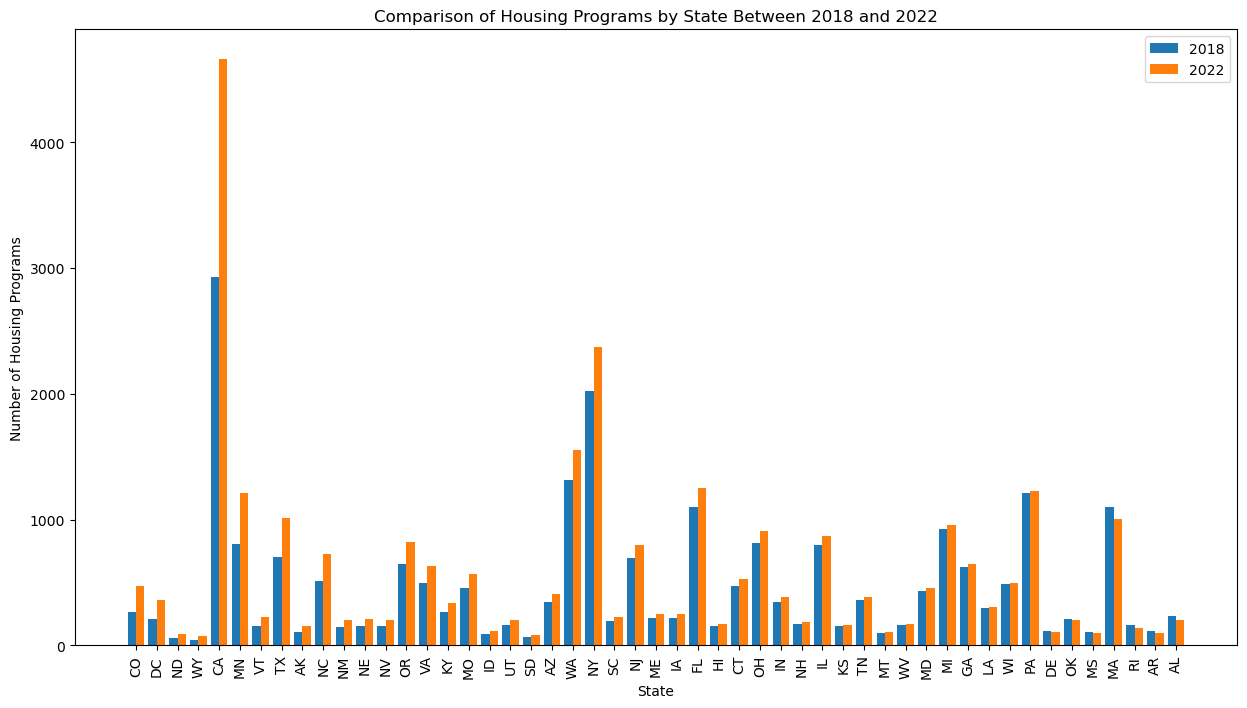

In [137]:
fig, ax = plt.subplots(figsize=(15, 8))
num_states = len(comparison_table.index)
ind = np.arange(0, num_states * 2, 2)  # the x locations for the groups
bar_width = 0.8  # the width of the bars

# Create the side-by-side bar chart
bars_2018 = ax.bar(ind - bar_width / 2, comparison_table[2018], bar_width, label='2018')
bars_2022 = ax.bar(ind + bar_width / 2, comparison_table[2022], bar_width, label='2022')

# Add labels and title
ax.set_xlabel('State')
ax.set_ylabel('Number of Housing Programs')
ax.set_title('Comparison of Housing Programs by State Between 2018 and 2022')
ax.set_xticks(ind)
ax.set_xticklabels(comparison_table.index, rotation=90)

# Add a legend
ax.legend()

plt.show()


### How many available beds are there compared to how many homeless people are using them per state per year?

In [122]:
grouped_table = subset_df.groupby(['CocState', 'year']).agg({
    'CoC': 'count',
    'Project Name': 'count',
    'Project Type': 'count',
    'Project ID': 'count',
    'Geo Code': 'count',
    'PIT Count': 'sum',
    'Total Beds': 'sum'
}).reset_index()


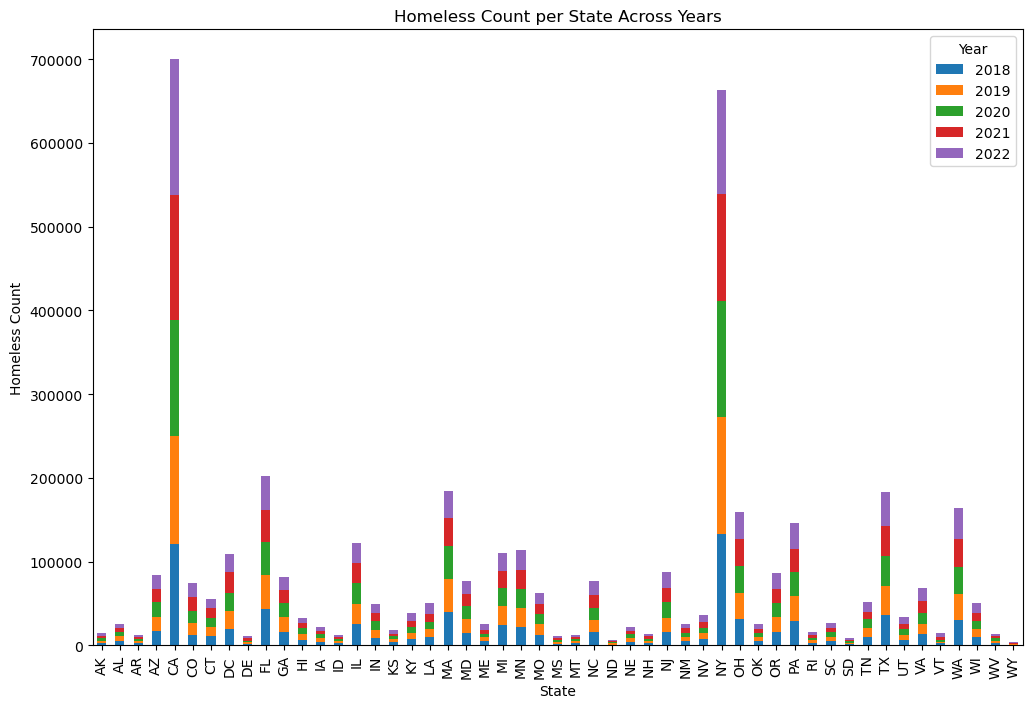

In [142]:
# Pivot the table for stacked bar chart
pivot_table = grouped_table.pivot_table(values='PIT Count', index='CocState', columns='year', fill_value=0)

# Create the stacked bar chart
ax = pivot_table.plot.bar(stacked=True, figsize=(12, 8))
plt.title("Homeless Count per State Across Years")
plt.xlabel("State")
plt.ylabel("Homeless Count")
plt.legend(title='Year', loc='upper right')
plt.show()


In [124]:
from IPython.display import display

# Filter the dataset for the year 2022
data_2022 = merged_df[merged_df['year'] == 2022]

# Group by 'CocState' and aggregate 'Total Beds' and 'PIT Count'
total_beds_pit_table = data_2022.groupby('CocState').agg({'Total Beds': 'sum', 'PIT Count': 'sum'}).reset_index()

total_beds_pit_table['Difference'] = total_beds_pit_table['Total Beds'] - total_beds_pit_table['PIT Count']

total_beds_pit_table['PIT Count'] = total_beds_pit_table['PIT Count'].astype(int)

display(total_beds_pit_table)


,CocState,Total Beds,PIT Count,Difference
0,AK,4992,3375,1617.0
1,AL,5876,4973,903.0
2,AR,3554,2029,1525.0
3,AZ,18661,16346,2315.0
4,CA,201685,163091,38594.0
5,CO,22015,16796,5219.0
6,CT,12543,11231,1312.0
7,DC,36145,22461,13684.0
8,DE,3745,3174,571.0
9,FL,49562,40865,8697.0


In [ ]:
# These results show that for each state in 2022 there were more beds than homeless accounted for.  The data does not show the types of housing the beds are located, only 
# showing that there is room to house them.  Types of housing include: Permanent Supportive, Emergency Shelter, Rapid Rehousing, Transitional Housing, Other Permanent Housing & Safe Haven.

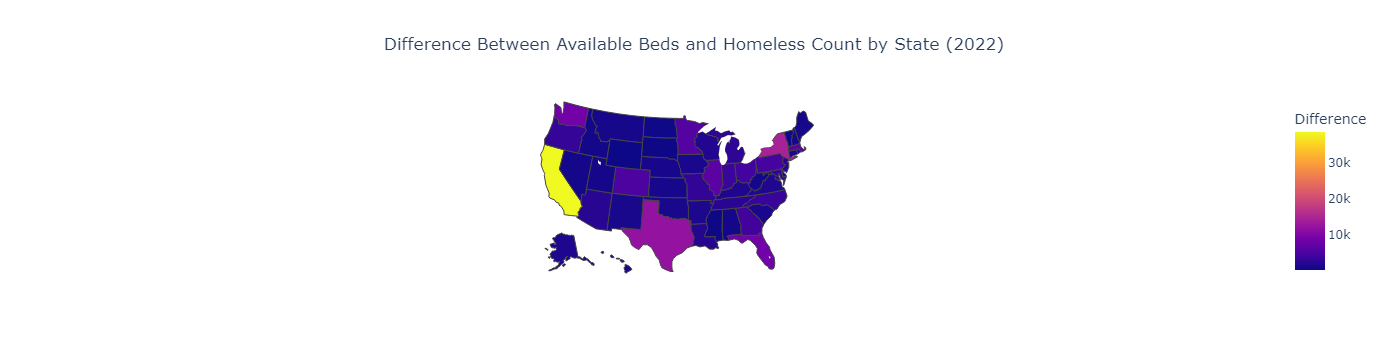

In [125]:
fig = px.choropleth(
    total_beds_pit_table,
    locations='CocState',
    color='Difference',
    locationmode='USA-states',
    scope='usa',
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Difference Between Available Beds and Homeless Count by State (2022)"
)
fig.update_layout(title_x=0.5)
fig.show()

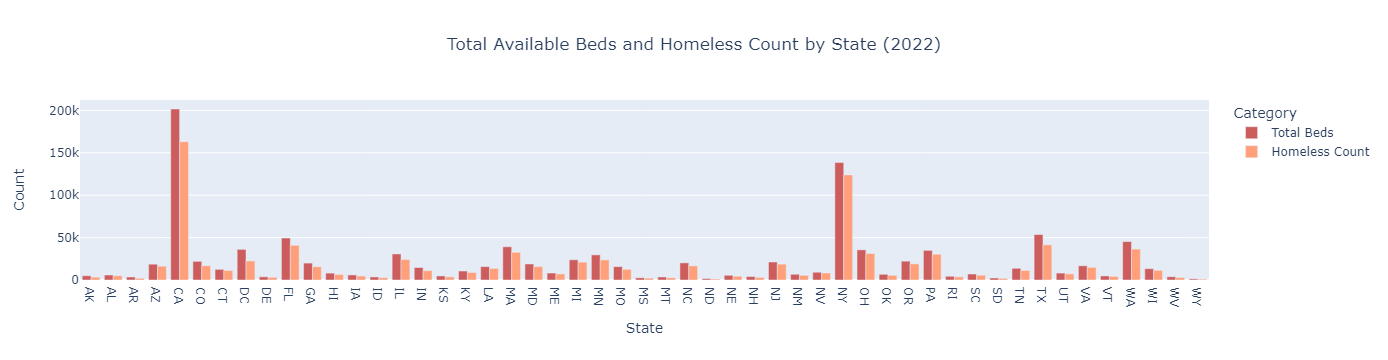

In [126]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x=total_beds_pit_table['CocState'],
    y=total_beds_pit_table['Total Beds'],
    name='Total Beds',
    marker_color='indianred'
))

fig.add_trace(go.Bar(
    x=total_beds_pit_table['CocState'],
    y=total_beds_pit_table['PIT Count'],
    name='Homeless Count',
    marker_color='lightsalmon'
))

fig.update_layout(
    barmode='group',
    title="Total Available Beds and Homeless Count by State (2022)",
    xaxis_title="State",
    yaxis_title="Count",
    legend_title="Category",
    title_x=0.5
)

fig.show()


### 2022 Percentage of Homelessness by State

In [132]:
# Aggregate the data for the year 2022
hic_2022 = merged_df[merged_df['year'] == 2022]

grouped_hic_2022 = (hic_2022.groupby('CocState')
                    .agg({'PIT Count': 'sum', 'Total Population': 'max'})
                    .reset_index()
                    .assign(Homeless_Percentage=lambda x: (x['PIT Count'] / x['Total Population']) * 100).round(2)
                    .sort_values(by='Homeless_Percentage', ascending=False))

grouped_hic_2022


,CocState,PIT Count,Total Population,Homeless_Percentage
7,DC,22461.0,671803.0,3.34
46,VT,4211.0,647064.0,0.65
34,NY,123980.0,19677151.0,0.63
21,ME,7180.0,1385340.0,0.52
47,WA,36462.0,7785786.0,0.47
19,MA,32629.0,6981974.0,0.47
0,AK,3375.0,733583.0,0.46
11,HI,6492.0,1440196.0,0.45
37,OR,18993.0,4240137.0,0.45
4,CA,163091.0,39029342.0,0.42


In [ ]:
# Focusing on last years numbers, each states total population compared to the homeless population shows that Florida had a homeless population of .18% with a total count
# of homeless individuals at 40,865.

### Correlation between population and Homeless Count

In [163]:
correlation = grouped_hic_2022[['Total Population', 'PIT Count']].corr()
print(correlation)


                  Total Population  PIT Count
Total Population          1.000000   0.837332
PIT Count                 0.837332   1.000000


In [ ]:
# The correlation coefficient between the total population and the PIT Count is 0.837332. This value indicates a strong positive correlation between the two variables. 
# This means that as the total population size increases, the PIT Count (number of homeless individuals) also tends to increase. 
# It is important to note that correlation does not imply causation, and there may be other factors affecting the relationship between population size and homelessness. 
# However, this finding suggests that larger populations are generally associated with higher levels of homelessness.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Project types per state for 2018-2022

In [164]:
project_type_distribution = merged_df.groupby(['CocState', 'CoC', 'Project Type']).size().reset_index(name='Count')
print(project_type_distribution)


     CocState                          CoC Project Type  Count
0          AK  Alaska Balance of State CoC           ES    156
1          AK  Alaska Balance of State CoC          OPH      1
2          AK  Alaska Balance of State CoC          PSH     77
3          AK  Alaska Balance of State CoC          RRH     56
4          AK  Alaska Balance of State CoC           TH     82
...       ...                          ...          ...    ...
1973       WV   Wheeling, Weirton Area CoC           TH     21
1974       WY        Wyoming Statewide CoC           ES    155
1975       WY        Wyoming Statewide CoC          PSH     37
1976       WY        Wyoming Statewide CoC          RRH     48
1977       WY        Wyoming Statewide CoC           TH     61

[1978 rows x 4 columns]


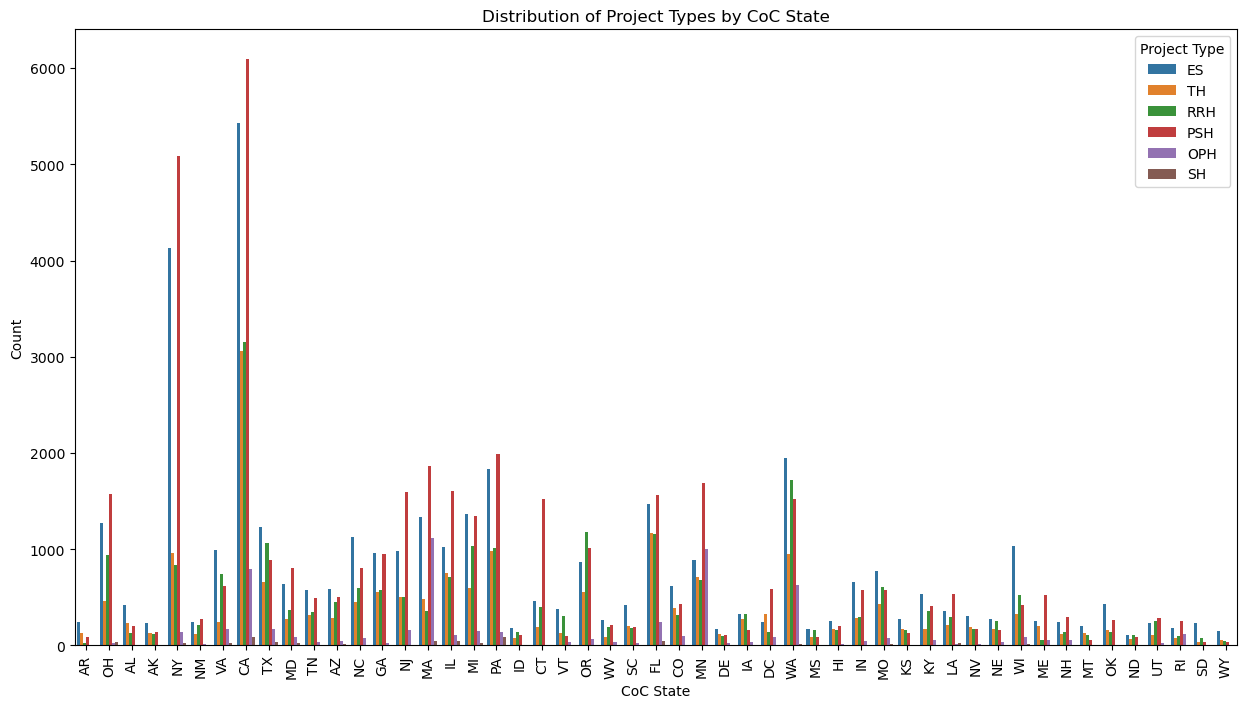

In [165]:
plt.figure(figsize=(15, 8))
sns.countplot(data=merged_df, x='CocState', hue='Project Type')
plt.xlabel('CoC State')
plt.ylabel('Count')
plt.title('Distribution of Project Types by CoC State')
plt.legend(title='Project Type', loc='upper right')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# From 2018 - 2022 (For all states) the Project Type that was the most used was Permanent Supportive Housing (41,270) followed by Emergency Shelter(39,565).

### Which project type was the most used for each state in the years 2018-2022?

In [7]:
highest_count_project_types = (
    merged_df.groupby(['CocState', 'year', 'Project Type'])
    .size()
    .reset_index(name='count')
    .sort_values(['CocState', 'year', 'count'], ascending=[True, True, False])
)

highest_count_project_types = highest_count_project_types.drop_duplicates(subset=['CocState', 'year'])

highest_count_project_types


,CocState,year,Project Type,count
0,AK,2018,ES,45
5,AK,2019,ES,38
10,AK,2020,ES,45
15,AK,2021,ES,42
20,AK,2022,ES,65
...,...,...,...,...
1392,WY,2018,ES,20
1396,WY,2019,ES,22
1400,WY,2020,ES,32
1404,WY,2021,ES,39


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How each Florida county grouping compares for the State of Florida 2018-2022

In [162]:
# Filter the data for CocState 'FL'
fl_data = merged_df[merged_df['CocState'] == 'FL']

# Group by 'CoC', 'year', and aggregate the 'Geo Code' and 'PIT Count' columns
fl_grouped = fl_data.groupby(['CoC', 'year']).agg({'Geo Code': 'first', 'PIT Count': 'sum', 'Total Beds': 'sum'}).reset_index()

# Display the table
fl_grouped


,CoC,year,Geo Code,PIT Count,Total Beds
0,"Citrus, Hernando, Lake, Sumter Counties CoC",2018,129017.0,669.0,800
1,"Citrus, Hernando, Lake, Sumter Counties CoC",2019,129017.0,572.0,608
2,"Citrus, Hernando, Lake, Sumter Counties CoC",2020,129017.0,523.0,614
3,"Citrus, Hernando, Lake, Sumter Counties CoC",2021,129017.0,537.0,656
4,"Citrus, Hernando, Lake, Sumter Counties CoC",2022,129017.0,685.0,772
...,...,...,...,...,...
130,West Palm Beach/Palm Beach County CoC,2018,129099.0,2097.0,2318
131,West Palm Beach/Palm Beach County CoC,2019,129099.0,1930.0,2194
132,West Palm Beach/Palm Beach County CoC,2020,129099.0,2147.0,2370
133,West Palm Beach/Palm Beach County CoC,2021,129099.0,2208.0,2689


### Ranking the County groupings by number of homeless for the year 2018

In [150]:
# Filter the data for CocState 'FL' and year 2018
fl_2018_data = merged_df[(merged_df['CocState'] == 'FL') & (merged_df['year'] == 2018)]

# Group by 'CoC' and aggregate the 'PIT Count' column
fl_2018_grouped = fl_2018_data.groupby(['CoC', 'year']).agg({'PIT Count': 'sum', 'Total Beds': 'sum'}).reset_index()

# Convert the 'PIT Count' column to an integer
fl_2018_grouped['PIT Count'] = fl_2018_grouped['PIT Count'].astype(int)

# Sort the grouped data by 'PIT Count' in descending order
fl_2018_ranked = fl_2018_grouped.sort_values(by='PIT Count', ascending=False)

# Display the ranked table
fl_2018_ranked


,CoC,year,PIT Count,Total Beds
11,Miami-Dade County CoC,2018,8163,8657
15,"Orlando/Orange, Osceola, Seminole Counties CoC",2018,4161,4784
5,Ft Lauderdale/Broward County CoC,2018,4088,4919
23,"St. Petersburg, Clearwater, Largo/Pinellas Cou...",2018,3735,4170
9,"Jacksonville-Duval, Clay Counties CoC",2018,3419,3677
25,Tampa/Hillsborough County CoC,2018,3307,3609
26,West Palm Beach/Palm Beach County CoC,2018,2097,2318
24,Tallahassee/Leon County CoC,2018,1539,1515
7,"Gainesville/Alachua, Putnam Counties CoC",2018,1325,1494
6,"Ft Myers, Cape Coral/Lee County CoC",2018,1224,1251


In [151]:
# Filter the data for CocState 'FL' and year 2018
fl_2022_data = merged_df[(merged_df['CocState'] == 'FL') & (merged_df['year'] == 2022)]

# Group by 'CoC' and aggregate the 'PIT Count' column
fl_2022_grouped = fl_2022_data.groupby(['CoC', 'year']).agg({'PIT Count': 'sum', 'Total Beds': 'sum'}).reset_index()

# Convert the 'PIT Count' column to an integer
fl_2022_grouped['PIT Count'] = fl_2022_grouped['PIT Count'].astype(int)

# Sort the grouped data by 'PIT Count' in descending order
fl_2022_ranked = fl_2022_grouped.sort_values(by='PIT Count', ascending=False)

# Display the ranked table
fl_2022_ranked

,CoC,year,PIT Count,Total Beds
11,Miami-Dade County CoC,2022,8025,9097
15,"Orlando/Orange, Osceola, Seminole Counties CoC",2022,4576,5640
25,Tampa/Hillsborough County CoC,2022,3604,3849
23,"St. Petersburg, Clearwater, Largo/Pinellas Cou...",2022,3341,4327
9,"Jacksonville-Duval, Clay Counties CoC",2022,2257,2636
26,West Palm Beach/Palm Beach County CoC,2022,2068,2528
5,Ft Lauderdale/Broward County CoC,2022,1972,2598
16,"Palm Bay, Melbourne/Brevard County CoC",2022,1826,1978
7,"Gainesville/Alachua, Putnam Counties CoC",2022,1544,1790
2,"Deltona, Daytona Beach/Volusia, Flagler Counti...",2022,1157,1431


### Florida by year by County grouping

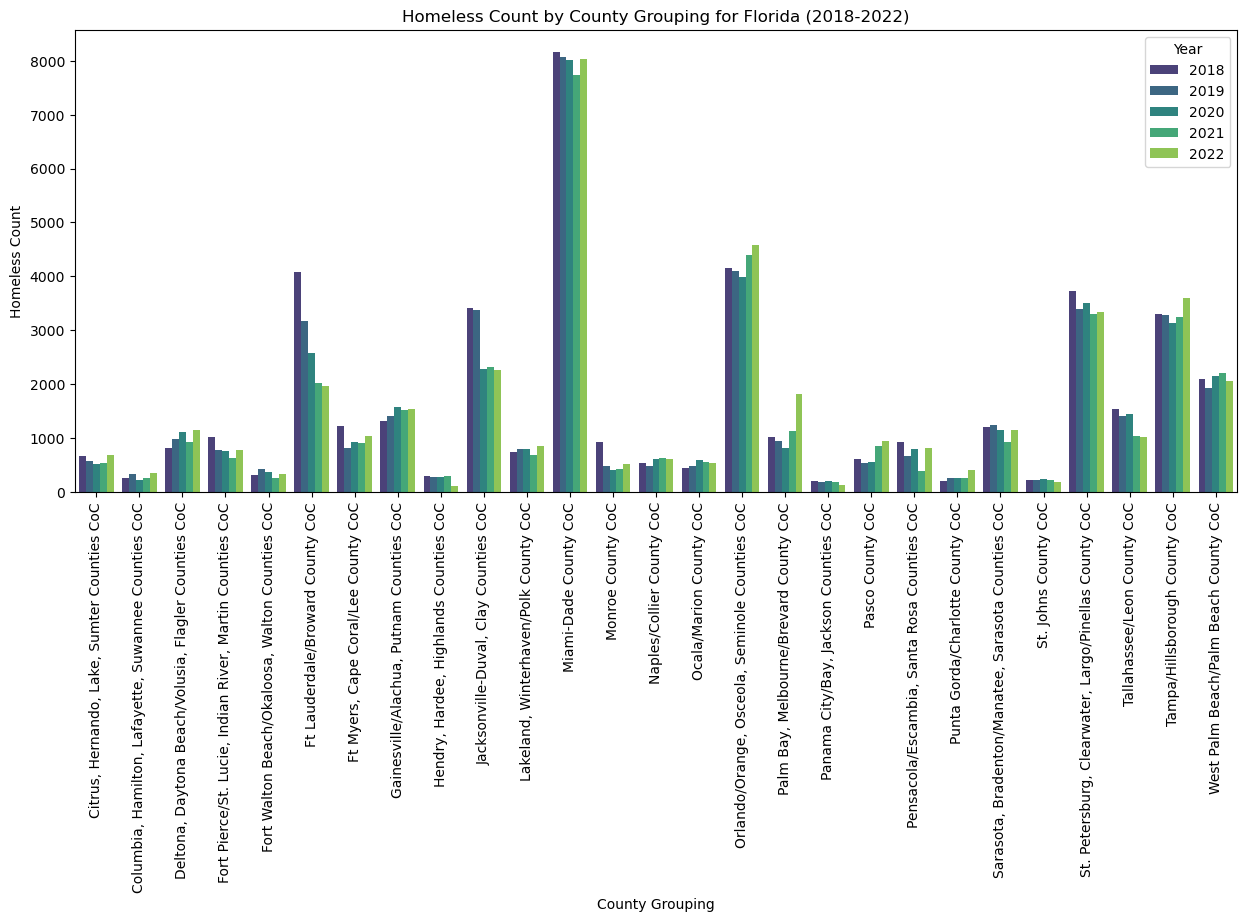

In [157]:
# Filter the data for CocState 'FL' and years 2018 to 2022
fl_data = merged_df[(merged_df['CocState'] == 'FL') & (merged_df['year'].between(2018, 2022))]

# Group by 'CoC' and 'year', and aggregate the 'PIT Count' and 'Total Beds' columns
fl_grouped = fl_data.groupby(['CoC', 'year']).agg({'PIT Count': 'sum', 'Total Beds': 'sum'}).reset_index()

# Create a bar plot with multiple bars per group using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(data=fl_grouped, x='CoC', y='PIT Count', hue='year', palette='viridis')

plt.xlabel('County Grouping')
plt.ylabel('Homeless Count')
plt.title('Homeless Count by County Grouping for Florida (2018-2022)')
plt.xticks(rotation=90)
plt.legend(title='Year')

plt.show()


### 2022 County grouping comparing county population to homeless count percentage

In [161]:
# Filter the data for CocState 'FL' and year 2022
fl_2022_data = merged_df[(merged_df['CocState'] == 'FL') & (merged_df['year'] == 2022)]

# Group by 'CoC' and aggregate the 'PIT Count', 'County Population', and 'Geo Code' columns
fl_2022_grouped = fl_2022_data.groupby('CoC').agg({'PIT Count': 'sum', 'Total Beds': 'sum', 'County Population': 'max', 'Geo Code': 'first'}).reset_index()

# Calculate the difference and percentage columns
fl_2022_grouped['Difference'] = fl_2022_grouped['County Population'] - fl_2022_grouped['PIT Count']
fl_2022_grouped['Percentage'] = (fl_2022_grouped['PIT Count'] / fl_2022_grouped['County Population']) * 100

# Round the Percentage column to 2 decimal places and convert the other columns to integers
fl_2022_grouped['Percentage'] = fl_2022_grouped['Percentage'].round(2)
fl_2022_grouped['PIT Count'] = fl_2022_grouped['PIT Count'].astype(int)
fl_2022_grouped['County Population'] = fl_2022_grouped['County Population'].astype(int)
fl_2022_grouped['Difference'] = fl_2022_grouped['Difference'].astype(int)

# Add the 'year' column
fl_2022_grouped['year'] = 2022

fl_2022_grouped_sorted = fl_2022_grouped.sort_values(by='Percentage', ascending=False).reset_index(drop=True)

fl_2022_grouped_sorted



,CoC,PIT Count,Total Beds,County Population,Geo Code,Difference,Percentage,year
0,Monroe County CoC,511,636,85808,129087.0,85297,0.60,2022
1,"Gainesville/Alachua, Putnam Counties CoC",1544,1790,360816,121038.0,359272,0.43,2022
2,Tallahassee/Leon County CoC,1026,1374,297211,129073.0,296185,0.35,2022
3,"St. Petersburg, Clearwater, Largo/Pinellas Cou...",3341,4327,971875,120492.0,968534,0.34,2022
4,"Palm Bay, Melbourne/Brevard County CoC",1826,1978,625584,121926.0,623758,0.29,2022
5,Miami-Dade County CoC,8025,9097,2763366,121968.0,2755341,0.29,2022
6,"Columbia, Hamilton, Lafayette, Suwannee Counti...",351,447,136197,129023.0,135846,0.26,2022
7,Tampa/Hillsborough County CoC,3604,3849,1528924,123012.0,1525320,0.24,2022
8,Punta Gorda/Charlotte County CoC,404,412,194908,129015.0,194504,0.21,2022
9,"Orlando/Orange, Osceola, Seminole Counties CoC",4576,5640,2425038,129095.0,2420462,0.19,2022


In [ ]:
# Out of all of the county groupings for the state of Florida for last year (2022) Monroe County had the highest percentage of homeless compared to their 
# total population. The Sarasota Counties ranked below the median with .13% homeless population.